In [1]:
import numpy as np
import ringity as rng
import networkx as nx
import matplotlib.pyplot as plt

from ringity.network_models.param_utils import (infer_density_parameter,
                                                beta_to_rate)

## Random regime 

In [2]:
random_state = np.random.randint(2**10)

N = 2**7

beta = np.random.uniform()
response = np.random.uniform()
coupling = np.random.uniform()

rate = beta_to_rate(beta)

In [3]:
def generate_network(return_positions = False, verbose = False):
    G = rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling,
                    return_positions = return_positions,
                    verbose = verbose)
    return G

G, pos = generate_network(return_positions = True, verbose = True)

Response parameter was set  to: r = 0.9673278189520426
Rate parameter was set to:   rate = 2.6649883213197483
Coupling parameter was set to:  c = 0.06472516862565147
Density parameter was set to: rho = 0.06304139926017727
General model detected.


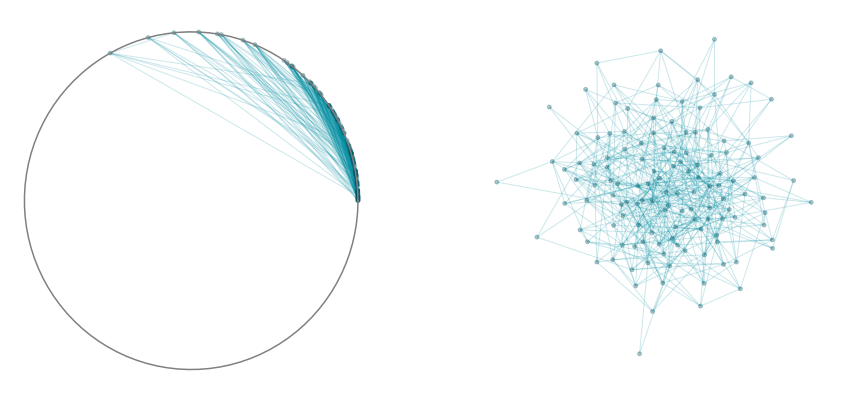

In [4]:
layout = {node : (np.cos(t), np.sin(t)) for node, t in zip(G, pos)}

circle_x = np.cos(np.linspace(0, 2*np.pi, 100))
circle_y = np.sin(np.linspace(0, 2*np.pi, 100))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))
ax1.plot(circle_x, circle_y, 'gray')
rng.plot_nx(G, pos = layout, ax = ax1)
rng.plot_nx(G, ax = ax2)

### Checking density inference

In [5]:
G_gen = (rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling) for _ in range(2**5))

obs_density = np.mean(list(map(nx.density, G_gen)))
exp_density = infer_density_parameter(
                        rate = rate,
                        response = response,                                
                        coupling = coupling)

print(obs_density)
print(exp_density)

0.06398022268700787
0.06304139926017727


## Uniform regime ($\beta = 1$)

In [6]:
random_state = np.random.randint(2**10)

N = 2**7

beta = 1
response = np.random.uniform()
coupling = np.random.uniform()

rate = beta_to_rate(beta)

In [7]:
def generate_network(return_positions = False, verbose = False):
    G = rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling,
                    return_positions = return_positions,
                    verbose = verbose)
    return G

G, pos = generate_network(return_positions = True, verbose = True)

Response parameter was set  to: r = 0.5637723415585348
Rate parameter was set to:   rate = 0.0
Coupling parameter was set to:  c = 0.7298242033471093
Density parameter was set to: rho = 0.41145470004709206
Uniform (GRGG) model detected.


In [18]:
import inspect

In [19]:
inspect.getfile(np.eye)

'/Users/markusyoussef/Documents/coding/venvs/ringity/lib/python3.9/site-packages/numpy/lib/twodim_base.py'

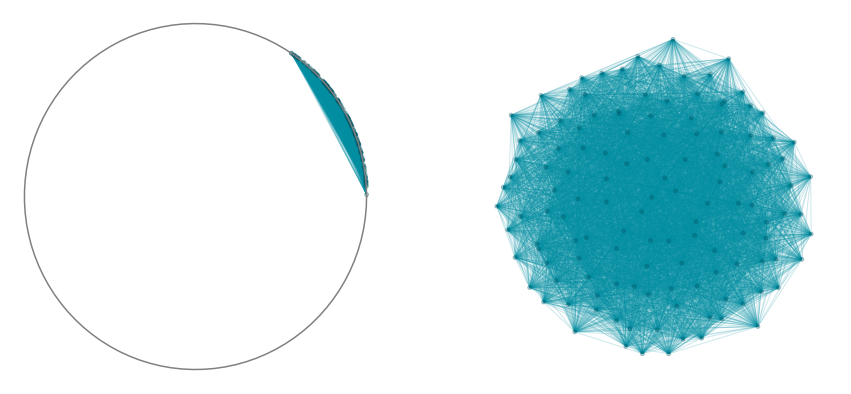

In [8]:
layout = {node : (np.cos(t), np.sin(t)) for node, t in zip(G, pos)}

circle_x = np.cos(np.linspace(0, 2*np.pi, 100))
circle_y = np.sin(np.linspace(0, 2*np.pi, 100))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))
ax1.plot(circle_x, circle_y, 'gray')
rng.plot_nx(G, pos = layout, ax = ax1)
rng.plot_nx(G, ax = ax2)

### Checking denisty inference

In [9]:
G_gen = (rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling) for _ in range(2**5))

obs_density = np.mean(list(map(nx.density, G_gen)))
exp_density = infer_density_parameter(
                        rate = rate,
                        response = response,                                
                        coupling = coupling)

print(obs_density)
print(exp_density)

0.004621370570866142
0.0007725617456123921


## ER regime ($\beta = 0$)

In [10]:
random_state = np.random.randint(2**10)

N = 2**7

beta = 0
response = np.random.uniform()
coupling = np.random.uniform()

rate = beta_to_rate(beta)

In [11]:
def generate_network(return_positions = False, verbose = False):
    G = rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling,
                    return_positions = return_positions,
                    verbose = verbose)
    return G

G, pos = generate_network(return_positions = True, verbose = True)

Response parameter was set  to: r = 0.29569396050143415
Rate parameter was set to:   rate = inf
Coupling parameter was set to:  c = 0.25103804507706307
Density parameter was set to: rho = 0.25103804507706307
Zero-distance (ER) model detected.


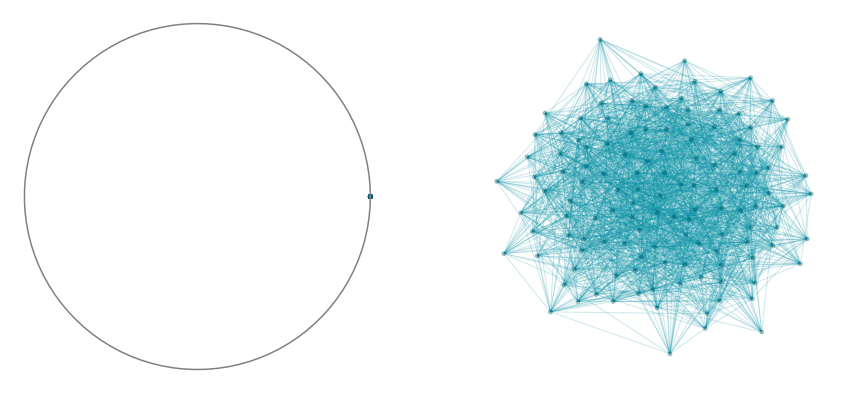

In [12]:
layout = {node : (np.cos(t), np.sin(t)) for node, t in zip(G, pos)}

circle_x = np.cos(np.linspace(0, 2*np.pi, 100))
circle_y = np.sin(np.linspace(0, 2*np.pi, 100))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))
ax1.plot(circle_x, circle_y, 'gray')
rng.plot_nx(G, pos = layout, ax = ax1)
rng.plot_nx(G, ax = ax2)

In [13]:
G_gen = (rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling) for _ in range(2**5))

obs_density = np.mean(list(map(nx.density, G_gen)))
exp_density = infer_density_parameter(
                        rate = rate,
                        response = response,                                
                        coupling = coupling)

print(obs_density)
print(exp_density)

0.250246062992126
0.25103804507706307


## Balanced regime ($r = 0.5$)

In [14]:
random_state = np.random.randint(2**10)

N = 2**7

beta = np.random.uniform()
response = 0.5
coupling = np.random.uniform()

rate = beta_to_rate(beta)

In [15]:
def generate_network(return_positions = False, verbose = False):
    G = rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling,
                    return_positions = return_positions,
                    verbose = verbose)
    return G

G, pos = generate_network(return_positions = True, verbose = True)

Response parameter was set  to: r = 0.5
Rate parameter was set to:   rate = 0.527789476928129
Coupling parameter was set to:  c = 0.7225857370265556
Density parameter was set to: rho = 0.4262625537120618
General model detected.


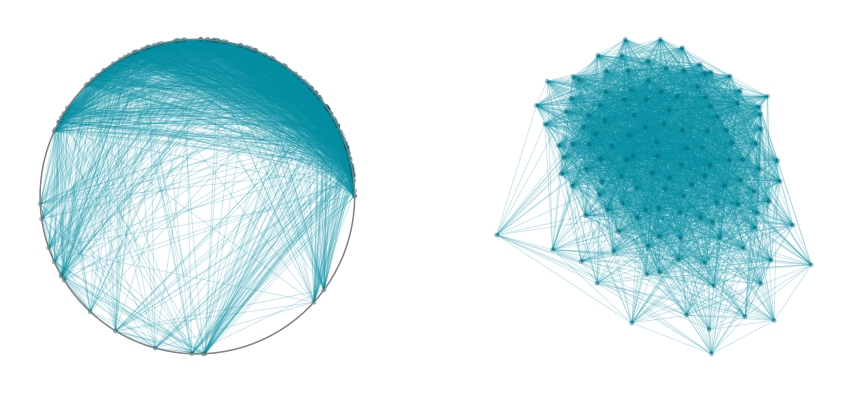

In [16]:
layout = {node : (np.cos(t), np.sin(t)) for node, t in zip(G, pos)}

circle_x = np.cos(np.linspace(0, 2*np.pi, 100))
circle_y = np.sin(np.linspace(0, 2*np.pi, 100))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))
ax1.plot(circle_x, circle_y, 'gray')
rng.plot_nx(G, pos = layout, ax = ax1)
rng.plot_nx(G, ax = ax2)

In [17]:
G_gen = (rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling) for _ in range(2**5))

obs_density = np.mean(list(map(nx.density, G_gen)))
exp_density = infer_density_parameter(
                        rate = rate,
                        response = response,                                
                        coupling = coupling)

print(obs_density)
print(exp_density)

0.42611958661417326
0.4262625537120618


## Empty regime ($r = 0$)

In [18]:
random_state = np.random.randint(2**10)

N = 2**7

beta = np.random.uniform()
response = 0.0
coupling = np.random.uniform()

rate = beta_to_rate(beta)

In [19]:
def generate_network(return_positions = False, verbose = False):
    G = rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling,
                    return_positions = return_positions,
                    verbose = verbose)
    return G

G, pos = generate_network(return_positions = True, verbose = True)

Response parameter was set  to: r = 0.0
Rate parameter was set to:   rate = 0.32572887231465
Coupling parameter was set to:  c = 0.9322851439933598
Density parameter was set to: rho = 0.0
Empty1 model detected.


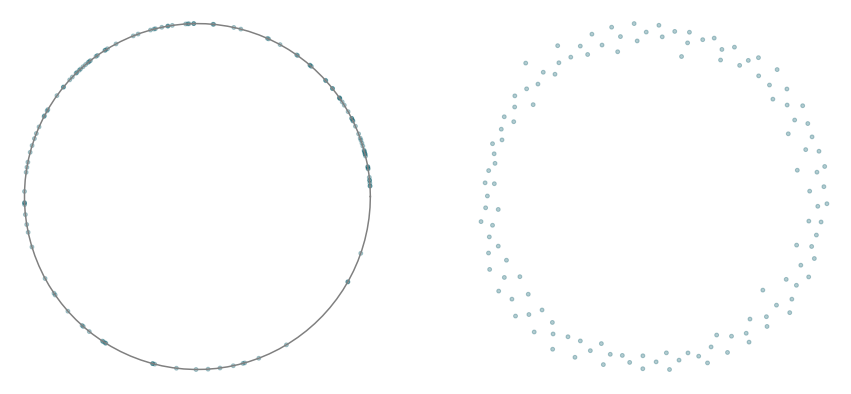

In [20]:
layout = {node : (np.cos(t), np.sin(t)) for node, t in zip(G, pos)}

circle_x = np.cos(np.linspace(0, 2*np.pi, 100))
circle_y = np.sin(np.linspace(0, 2*np.pi, 100))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))
ax1.plot(circle_x, circle_y, 'gray')
rng.plot_nx(G, pos = layout, ax = ax1)
rng.plot_nx(G, ax = ax2)

In [21]:
G_gen = (rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling) for _ in range(2**5))

obs_density = np.mean(list(map(nx.density, G_gen)))
exp_density = infer_density_parameter(
                        rate = rate,
                        response = response,                                
                        coupling = coupling)

print(obs_density)
print(exp_density)

0.0
0.0


## ER regime 2 ($r = 1$)

In [22]:
random_state = np.random.randint(2**10)

N = 2**7

beta = np.random.uniform()
response = 1.0
coupling = np.random.uniform()

rate = beta_to_rate(beta)

In [23]:
def generate_network(return_positions = False):
    G = rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling,
                    return_positions = return_positions)
    return G

G, pos = generate_network(return_positions = True)

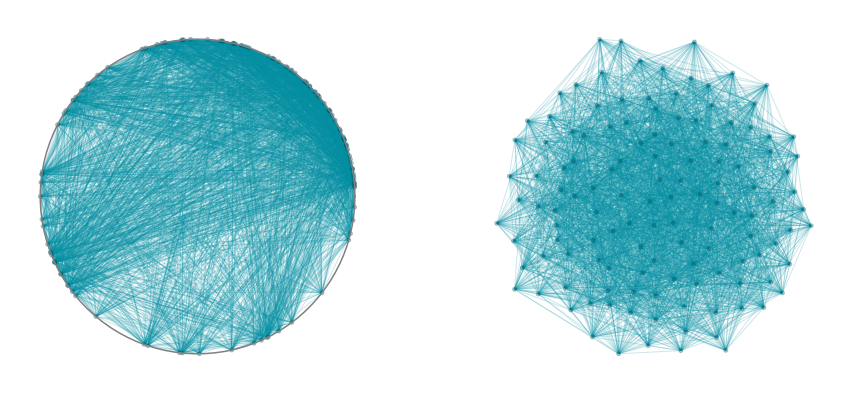

In [24]:
layout = {node : (np.cos(t), np.sin(t)) for node, t in zip(G, pos)}

circle_x = np.cos(np.linspace(0, 2*np.pi, 100))
circle_y = np.sin(np.linspace(0, 2*np.pi, 100))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))
ax1.plot(circle_x, circle_y, 'gray')
rng.plot_nx(G, pos = layout, ax = ax1)
rng.plot_nx(G, ax = ax2)

In [25]:
G_gen = (rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling) for _ in range(2**5))

obs_density = np.mean(list(map(nx.density, G_gen)))
exp_density = infer_density_parameter(
                        rate = rate,
                        response = response,                                
                        coupling = coupling)

print(obs_density)
print(exp_density)

0.3857421875
0.38435142686980617


## Empty regime 2 ($c = 0$)

In [26]:
random_state = np.random.randint(2**10)

N = 2**7

beta = np.random.uniform()
response = np.random.uniform()
coupling = 0

rate = beta_to_rate(beta)

In [27]:
def generate_network(return_positions = False):
    G = rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling,
                    return_positions = return_positions)
    return G

G, pos = generate_network(return_positions = True)

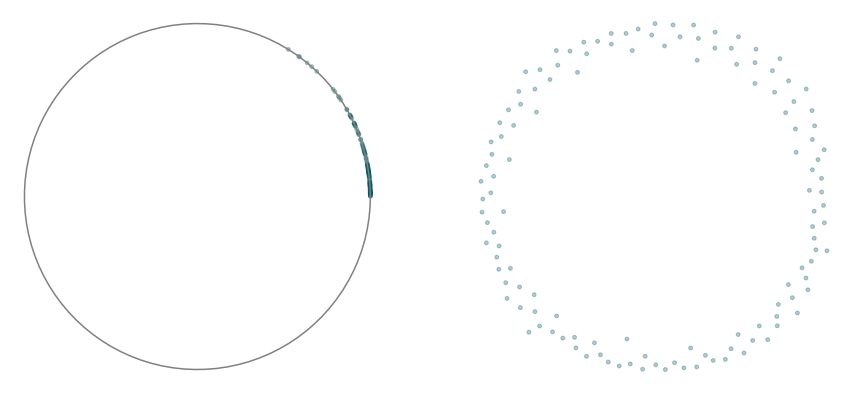

In [28]:
layout = {node : (np.cos(t), np.sin(t)) for node, t in zip(G, pos)}

circle_x = np.cos(np.linspace(0, 2*np.pi, 100))
circle_y = np.sin(np.linspace(0, 2*np.pi, 100))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))
ax1.plot(circle_x, circle_y, 'gray')
rng.plot_nx(G, pos = layout, ax = ax1)
rng.plot_nx(G, ax = ax2)

In [29]:
G_gen = (rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling) for _ in range(2**5))

obs_density = np.mean(list(map(nx.density, G_gen)))
exp_density = infer_density_parameter(
                        rate = rate,
                        response = response,                                
                        coupling = coupling)

print(obs_density)
print(exp_density)

0.0
0.0


## Standard regime ($c = 1$)

In [30]:
random_state = np.random.randint(2**10)

N = 2**7

beta = np.random.uniform()
response = np.random.uniform()
coupling = 1

rate = beta_to_rate(beta)

In [31]:
def generate_network(return_positions = False):
    G = rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling,
                    return_positions = return_positions)
    return G

G, pos = generate_network(return_positions = True)

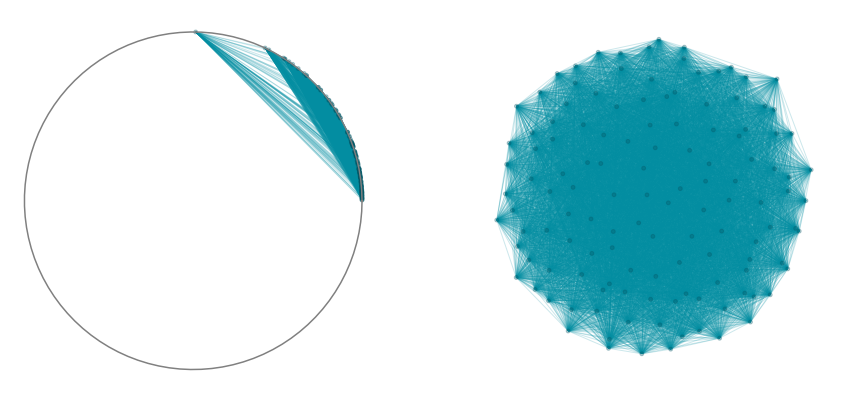

In [32]:
layout = {node : (np.cos(t), np.sin(t)) for node, t in zip(G, pos)}

circle_x = np.cos(np.linspace(0, 2*np.pi, 100))
circle_y = np.sin(np.linspace(0, 2*np.pi, 100))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))
ax1.plot(circle_x, circle_y, 'gray')
rng.plot_nx(G, pos = layout, ax = ax1)
rng.plot_nx(G, ax = ax2)

In [33]:
G_gen = (rng.network_model(
                    N = N,          
                    response = response,                 
                    beta = beta,            
                    coupling = coupling) for _ in range(2**5))

obs_density = np.mean(list(map(nx.density, G_gen)))
exp_density = infer_density_parameter(
                        rate = rate,
                        response = response,                                
                        coupling = coupling)

print(obs_density)
print(exp_density)

0.9312100147637796
0.9305947298273025


## Miscellaneous

### Max density

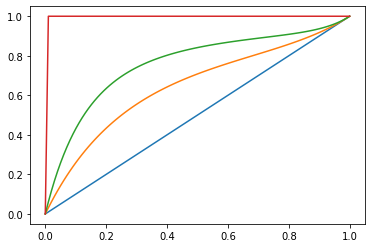

In [34]:
from ringity.network_models.param_utils import max_density

x = np.linspace(0, 1, 100)
y0 = [max_density(0, xi) for xi in x]
y1 = [max_density(1, xi) for xi in x]
y2 = [max_density(2, xi) for xi in x]
yinf = [max_density(np.inf, xi) for xi in x]

plt.plot(x, y0)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, yinf)